## Background

The fold card allows the user to get sats back on purchases rather than a percentage of the purchase in fiat. Speciifcally, it is not a static percentage of the purchase the user gets back, but an opportunity to spin a random wheel for varying levels of sats back. The wheel, sats back, and percentages change on a regular basis. This is an analysis of Fold's 2022 New Year wheel.

Fold states that the expected frequency of it's results are:

Spinbomb - 4% (spinbombs result in many extra spins that the user must use within minutes)

Deposits - 5.5% (the user gets 100% of their 30 day deposits in sats up to 1000 sats)

Purchases - 5.5% (the user gets 100% of their largest purchase back in sats up to 5000 sats)

0.5% back - 49.99% (the user gets 0.5% of the purchase back in sats to a max of $25 in sats)

1% back - 18.0% (the user gets 1% of the purchase back in sats to a max of $25 in sats)

2% back - 10% (the user gets 2% of the purchase back in sats to a max of $25 in sats)

3% back - 3% (the user gets 3% of the purchase back in sats up to a max of $25)

4% back - 2% (The user gets 4% of the purchase back in sats to a max of $50 in sats)

5% back - 1% (The user gets 5% of the purchase back in sats up to a value of $50 in sats)

100% back - .005% (100% back in sats up to a max of $50)

10% over/under - 1% (10% of the purchase back if it was more than $500, otherwise no reward)

$500 of bitcoin - .005% (just like it sounds)

Once a user spins, they may accept their spin result or use earned additional spins to improve their sats back. Alternately, new for the New Year, the user may elect a flat 1.5% back in sats and not use a spin at all.

# Method
107 consequtive spins were recorded. These include original spins and used extra spins that the user aquired via Fold's processes. Spin results that did not occur in the sample were ignored in this analysis. 

The initial sample was used to bootstrap larger random samples and the distribution of the resulting frequencies was compared to the published expected frequencies.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's bring in Fold's published odds as our expected frequencies (Exp_Freq).

In [16]:
fold_says = {'Spinbomb':.04,'Dep':.055,'Purch':.055,'1%':.18,'0.5%':.4999,'4%':.02,'5%':.01,'3%':.03,'2%':.1,'10%':.01}
expected_df = pd.DataFrame({'Result':['Spinbomb','Dep','Purch','0.5%','1%','2%','3%','4%','5%','10%'],
             'Freq':[.04,.055,.055,.4999,.18,.1,.03,.02,.01,.01]}).set_index('Result',drop=True)
expected_df['Type']='Exp_Freq'
expected_df.reset_index(inplace=True,drop=False)
expected_df

,Result,Freq,Type
0,Spinbomb,0.0400,Exp_Freq
1,Dep,0.0550,Exp_Freq
2,Purch,0.0550,Exp_Freq
3,0.5%,0.4999,Exp_Freq
4,1%,0.1800,Exp_Freq
5,2%,0.1000,Exp_Freq
6,3%,0.0300,Exp_Freq
7,4%,0.0200,Exp_Freq
8,5%,0.0100,Exp_Freq
9,10%,0.0100,Exp_Freq


Now, we'll take a look at the 105 observed spins from the last two weeks of 2021.

In [17]:
obs_spins = pd.read_csv('New_Year_Wheel.csv').SPIN_RESULT.tolist()
# obs_spins


In [18]:
#create dataframe of observed spins frequency
observed_df = pd.DataFrame(pd.DataFrame({'Result':obs_spins}).value_counts(normalize=True),columns=['Freq'])
observed_df['Type']='Obs_Freq'
observed_df.reset_index(inplace=True,drop=False)
observed_df

,Result,Freq,Type
0,0.5%,0.476636,Obs_Freq
1,1%,0.149533,Obs_Freq
2,2%,0.121495,Obs_Freq
3,5%,0.074766,Obs_Freq
4,4%,0.046729,Obs_Freq
5,Purch,0.046729,Obs_Freq
6,3%,0.037383,Obs_Freq
7,Dep,0.028037,Obs_Freq
8,10%,0.009346,Obs_Freq
9,Spins,0.009346,Obs_Freq


Now let's bring these together for an initial look.

In [19]:
df=observed_df.append(expected_df)

df

,Result,Freq,Type
0,0.5%,0.476636,Obs_Freq
1,1%,0.149533,Obs_Freq
2,2%,0.121495,Obs_Freq
3,5%,0.074766,Obs_Freq
4,4%,0.046729,Obs_Freq
5,Purch,0.046729,Obs_Freq
6,3%,0.037383,Obs_Freq
7,Dep,0.028037,Obs_Freq
8,10%,0.009346,Obs_Freq
9,Spins,0.009346,Obs_Freq


And we can visualize this for an ituitive first look.

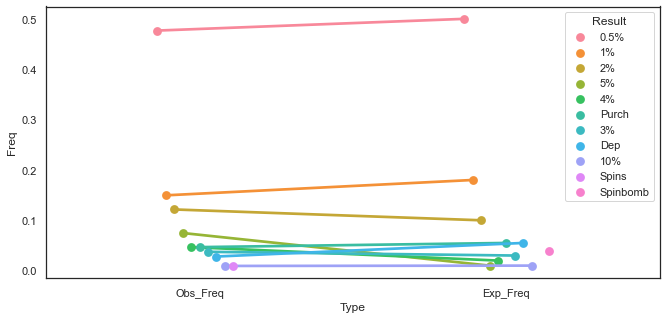

In [20]:
sns.set(rc={'figure.figsize':(11,5)})
sns.set_style('white')
sns.pointplot(x=df.Type, y=df.Freq,hue=df.Result,data=df,dodge=True);

In [21]:
spins = np.array(obs_spins)

Now we create empty lists to hold our bootstrapped frequencies.

In [36]:
purch_freqs=[]
sats_freqs=[]
half_perc_freqs=[]
spinbomb_freqs=[]
perc_2_freqs=[]
dep_freqs=[]
perc_4_freqs=[]
perc_1_freqs=[]
perc_3_freqs=[]
perc_5_freqs=[]
perc_10_freqs=[]

Next comes the primary bootstrapping process. We will run 10,000 iterations of resampling the 105 spins with replacement. This process picks randomly from the original spins without excluding those spins already chosen giving us the opportunity to find a distribution over which the 105 spins could have happened. 

In [37]:
for i in range(10000):
    #create bootstrap sample
    boot = np.random.choice(spins,spins.size,replace=True)
    # find resulting frequency for 30-day purchases
    purch_freq = boot[boot=='Purch'].size/boot.size
    purch_freqs.append(purch_freq)
    # find resulting frequency for 10%
    perc_10_freq = boot[boot=='10%'].size/boot.size
    perc_10_freqs.append(perc_10_freq)
    # find resulting frequency for 0.5% back
    half_perc_freq = boot[boot=='0.5%'].size/boot.size
    half_perc_freqs.append(half_perc_freq)
    # find resulting frequency for Spinbomb
    spinbomb_freq = boot[boot=='Spinbomb'].size/boot.size
    spinbomb_freqs.append(spinbomb_freq)
    # find resulting frequency for 1% back
    perc_1_freq = boot[boot=='1%'].size/boot.size
    perc_1_freqs.append(perc_15_freq)
    # find resulting frequency for 30-day deposits back
    dep_freq = boot[boot=='Dep'].size/boot.size
    dep_freqs.append(dep_freq)
    # find resulting frequency for 4% back
    perc_4_freq = boot[boot=='4%'].size/boot.size
    perc_4_freqs.append(perc_4_freq)
    # find resulting frequency for 2% back
    perc_2_freq = boot[boot=='2%'].size/boot.size
    perc_2_freqs.append(perc_1_freq)
    # find resulting frequency for 3% back
    perc_3_freq = boot[boot=='3%'].size/boot.size
    perc_3_freqs.append(perc_1_freq)
    # find resulting frequency for 5% back
    perc_5_freq = boot[boot=='5%'].size/boot.size
    perc_5_freqs.append(perc_1_freq)


0.7395

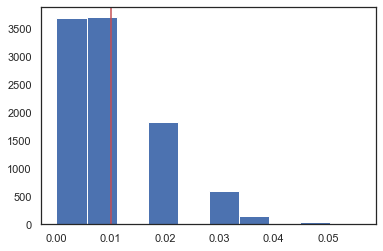

In [38]:
plt.figure(figsize=(6,4))
plt.hist(perc_10_freqs)
plt.axvline(fold_says.get('10%'),color='r');
(np.array(perc_10_freqs) <= fold_says.get('10%')).mean()

The 95% confidence interval for the bootstrapped mean does include the expected frequency of 10% over/under. The chance of getting 10% back does occur if the purchase has been great enough. Of course, the question really is, what percentage of your purchases exceed $500?

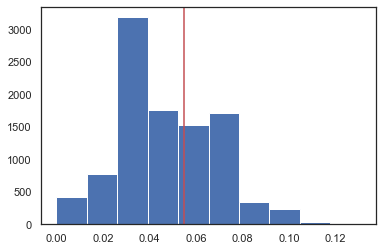

In [39]:
plt.figure(figsize=(6,4))
plt.hist(purch_freqs)
plt.axvline(fold_says.get('Purch'),color='r');

The 95% confidence interval for the bootstrapped mean includes the expected frequency of winning the highest purchase in sats.

0.3176

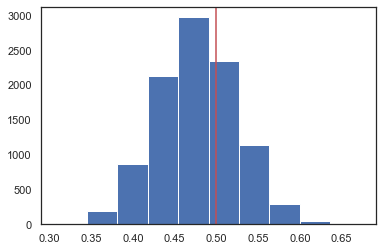

In [40]:
plt.figure(figsize=(6,4))
plt.hist(half_perc_freqs)
plt.axvline(fold_says.get('0.5%'),color='r');
(np.array(half_perc_freqs)>=fold_says.get('0.5%')).mean()

The 95% confidence interval of the mean of the bootstrapped samples contains the expected frequency of winning 0.5% of the purchase.

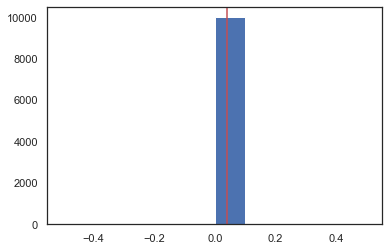

In [41]:
plt.figure(figsize=(6,4))
plt.hist(spinbomb_freqs)
plt.axvline(fold_says.get('Spinbomb'),color='r');

The published frequency occurs within the 95% confidence interval of the bootstrapped samples.

0.0615

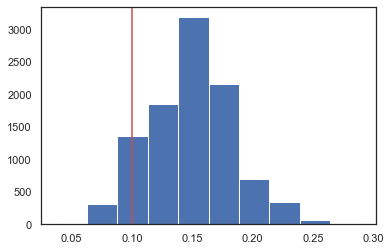

In [43]:
plt.figure(figsize=(6,4))
plt.hist(perc_2_freqs)
plt.axvline(fold_says.get('2%'),color='r');
(np.array(perc_2_freqs)<=fold_says.get('2%')).mean()

The published frequency of winning 2% of the purchase back in sats is within the 95% confidence interval of the bootstrapped samples, but not by much.

0.9175

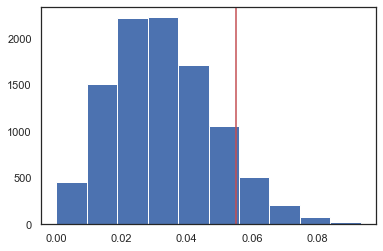

In [45]:
plt.figure(figsize=(6,4))
plt.hist(dep_freqs)
plt.axvline(fold_says.get('Dep'),color='r');
(np.array(dep_freqs)<=fold_says.get('Dep')).mean()

The published frequency of winning 30 days Deposits in sats is within the 95% confidence interval of the bootstrapped samples.

0.1154

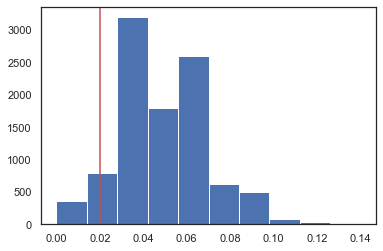

In [47]:
plt.figure(figsize=(6,4))
plt.hist(perc_4_freqs)
plt.axvline(fold_says.get('4%'),color='r');
(np.array(perc_4_freqs)<=fold_says.get('4%')).mean()

The chance of winning 4% occurs within the 95% confidence interval of the expected outcome.

1.0

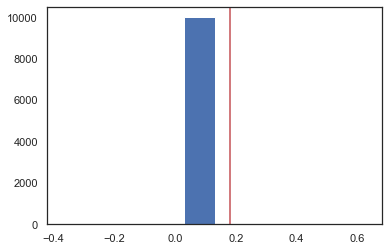

In [49]:
plt.figure(figsize=(6,4))
plt.hist(perc_1_freqs)
plt.axvline(fold_says.get('1%'),color='r');
(np.array(perc_1_freqs) < fold_says.get('1%')).mean()

The chance of getting 1% back occurs outside the 95% confidence limit of the expected frequency. It occurs less often.

0.0

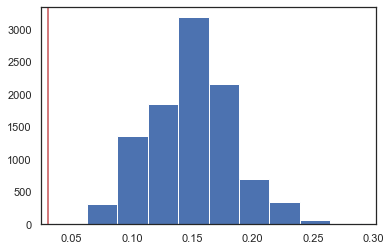

In [50]:
plt.figure(figsize=(6,4))
plt.hist(perc_3_freqs)
plt.axvline(fold_says.get('3%'),color='r');
(np.array(perc_3_freqs) < fold_says.get('3%')).mean()

The chance of getting 3% back occurs more frequently than expected.

0.0

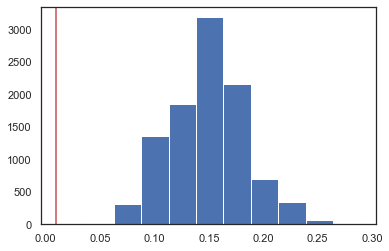

In [52]:
plt.figure(figsize=(6,4))
plt.hist(perc_5_freqs)
plt.axvline(fold_says.get('5%'),color='r');
(np.array(perc_5_freqs) < fold_says.get('5%')).mean()

The chance of winning 5% back occurs more frequently than expected.

# Conclusion

The New Year Wheel from fold seems to be more generous in terms of 3% and 5%, 